In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.tree import *
from sklearn.metrics import r2_score, matthews_corrcoef
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
df_atom=pd.read_csv('caco_AtomPair.tsv', sep='\t', index_col=False)
df_atom.shape
#df_atom.head()

(3796, 997)

In [3]:
df_dragon=pd.read_csv('caco_Dragon.tsv', sep='\t', index_col=False)
df_dragon.head()
#pd.DataFrame.to_csv(df_dragon)

,Molecule,ClogP,QikProp_.stars,QikProp_.amine,QikProp_.amidine,QikProp_.acid,QikProp_.amide,QikProp_.rotor,QikProp_.rtvFG,QikProp_CNS,...,QikProp_PSA,QikProp_.NandO,QikProp_RuleOfFive,QikProp_.ringatoms,QikProp_.in34,QikProp_.in56,QikProp_.noncon,QikProp_.nonHatm,QikProp_RuleOfThree,QikProp_ACxDN..5.SAxSASA.MW
0,Compound0001,0.799,5,0,0,1,0,1,0,-1,...,62.041,3,0,6,0,6,0,9,0,0.028430
1,Compound0002,0.534,0,0,0,0,0,5,0,-2,...,111.738,6,0,16,0,16,3,21,1,0.041983
2,Compound0003,1.019,0,2,0,1,0,5,0,-1,...,120.746,9,1,27,0,24,7,38,1,0.019764
3,Compound0004,1.578,0,2,0,1,0,5,0,-1,...,113.431,9,1,28,0,18,8,39,1,0.019244
4,Compound0005,1.709,0,2,0,1,0,4,0,-1,...,120.305,9,1,27,0,24,7,37,1,0.020314


In [4]:
df_quick=pd.read_csv('caco_QuickProp.tsv', sep='\t', index_col=False)
df_quick.shape
#list(df_quick)

(3796, 52)

In [5]:
df_pipe_FP=pd.read_csv('caco_PipelinePilot_FP.tsv', sep='\t', index_col=False)
df_pipe_FP.shape
#list(df_pipe_FP)

(3796, 5402)

In [6]:
df_out=pd.read_csv('caco_Outcome.tsv', sep='\t', index_col=False)
list(df_out)

['Molecule', 'Class']

In [7]:
df_out.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [8]:
x_df=df_dragon

In [9]:
#x_df.drop(x_df.columns[[1]], axis=1)
#x_df
x_df.set_index('Molecule', inplace=True)
x_df.shape

(3796, 52)

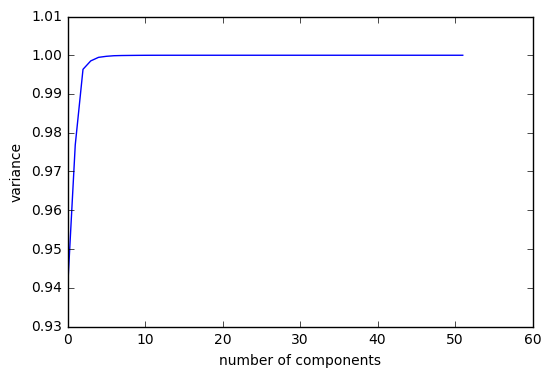

In [10]:
pca=PCA().fit(x_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("variance")
plt.show()


In [11]:
pca=PCA(n_components=52)
x_pca=pca.fit_transform(x_df)
x_pca

array([[ -1.40335006e+03,   7.01409152e+01,  -1.07842492e+03, ...,
         -2.04727103e-05,   1.08159248e-05,  -4.20342238e-06],
       [ -1.51819296e+03,   2.43823452e+01,  -5.84636651e+02, ...,
         -1.60950841e-05,   1.40740739e-05,  -1.07600468e-06],
       [ -1.62040783e+03,  -7.55738370e+01,   2.88863687e+02, ...,
          1.94493486e-05,  -1.20254644e-05,  -1.92309046e-06],
       ..., 
       [ -1.39892385e+03,  -5.47474795e+01,  -4.33796765e+02, ...,
          2.74851986e-05,   7.33297167e-06,  -2.97213360e-06],
       [  2.18144167e+03,  -9.08005200e+02,  -2.63321722e+02, ...,
          7.65010026e-06,  -7.93342243e-06,  -6.69289111e-06],
       [ -1.32946514e+03,   5.75405337e+01,  -4.97938366e+02, ...,
          6.61600169e-06,  -2.42142725e-05,  -2.25425992e-06]])

In [12]:
y_df=df_out
y_df.head()

,Molecule,Class
0,Compound0001,M
1,Compound0002,L
2,Compound0003,M
3,Compound0004,M
4,Compound0005,M


In [13]:
y_final=y_df.drop('Molecule', axis=1)
y_final.head()


,Class
0,M
1,L
2,M
3,M
4,M


In [14]:
x_train_df, x_test_df, y_train_df, y_test_df=train_test_split(x_pca, y_final, test_size=0.2)
#x_train_int=table.Columns.RemoveAt(0)

In [15]:
count_L=np.array(y_test_df['Class']=='L')
unique, counts= np.unique(count_L, return_counts=True)
dict(zip(unique, counts))

{False: 683, True: 77}

In [16]:
count_M=np.array(y_test_df['Class']=='M')
unique, counts= np.unique(count_M, return_counts=True)
dict(zip(unique, counts))

{False: 351, True: 409}

In [17]:
count_H=np.array(y_test_df['Class']=='H')
unique, counts = np.unique(count_H, return_counts=True)
dict(zip(unique, counts))

{False: 486, True: 274}

In [18]:
x_scaler=StandardScaler()
clf_model=x_scaler.fit(x_train_df)
x_train_norm=clf_model.transform(x_train_df)
x_test_norm=clf_model.transform(x_test_df)
x_train_norm.shape, x_test_norm.shape

((3036, 52), (760, 52))

In [19]:
y_encoder=LabelEncoder()
y_encoded_tr=y_encoder.fit_transform(y_train_df)
y_enc_tr=np_utils.to_categorical(y_encoded_tr)
y_enc_tr.shape
y_encoded_test=y_encoder.fit_transform(y_test_df)
y_enc_test=np_utils.to_categorical(y_encoded_test)
y_enc_tr.shape,y_enc_test.shape

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((3036, 3), (760, 3))

In [20]:
y_enc_tr.shape[0], y_enc_tr.shape[1]

(3036, 3)

In [21]:
y_scaler=StandardScaler()
y_scaler.fit(y_enc_tr)
y_train_norm=y_scaler.transform(y_enc_tr)
y_test_norm=y_scaler.transform(y_enc_test)
y_train_norm.shape

(3036, 3)

**NEURAL NETWORK**

In [22]:
seed=7
np.random.seed(seed)

In [23]:
def baseline_model():
    model=Sequential()
    model.add(Dense(5, input_dim=5,init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(75, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(25, init='normal', activation='relu'))
    #model.add(Dropout(0.2))   
    #model.add(Dense(12, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(3, init='normal', activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    return model

In [24]:
#fit and evaluate the model
estimators=[]
#estimators.append(('standardise',StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, nb_epoch=100, batch_size=200, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
#results=cross_val_score(pipeline, x_train_norm, y_train_norm, cv=kfold)
#print('accuracy:', results.mean()*100)

In [25]:
x_train_norm.shape, x_test_norm.shape, y_train_norm.shape, y_test_norm.shape

((3036, 52), (760, 52), (3036, 3), (760, 3))

In [26]:
y_train_final, y_test_final=train_test_split(y_final, test_size=0.2)
y_train_final.shape

(3036, 1)

In [27]:
clf_linear=linear_model.LogisticRegression()
model_linear=clf_linear.fit(x_train_norm, y_train_final)
predict_logit=clf_linear.predict(x_test_norm)
acc_logit=model_linear.score(x_test_norm, y_test_final)
precision_recall_fscore_support(y_test_final, predict_logit, average='weighted')

#rint('accuracy:',acc_logit)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.37433063618142676, 0.51184210526315788, 0.39025631200514016, None)

In [28]:
#predict_logit, y_test_final

In [29]:
#calculation of the confusion matrix for Logistic
clf_logit_predict=clf_linear.predict(x_test_norm)
confusion_matrix(y_test_final, clf_logit_predict)

cmatrix_logit=confusion_matrix(y_test_final, clf_logit_predict)
cmatrix_logit.diagonal()/cmatrix_logit.sum(axis=1)

array([ 0.0433213,  0.       ,  0.9195122])

In [30]:
tree_c=DecisionTreeClassifier(random_state=seed)#check this
model_c=tree_c.fit(x_train_norm, y_train_final)
predict_tree_d=model_c.predict(x_test_norm)
acc_clf=model_c.score(x_test_norm, y_test_final)
precision_recall_fscore_support(y_test_final, predict_tree_d, labels=['L', 'M',"H"])

#print('predicted array:', predict_tree_d)
#print('accuracy:', acc_clf )
#model_c.classes_

(array([ 0.1       ,  0.54048964,  0.37899543]),
 array([ 0.01369863,  0.7       ,  0.29963899]),
 array([ 0.02409639,  0.60998937,  0.33467742]),
 array([ 73, 410, 277], dtype=int64))

In [31]:
confusion_matrix(y_test_final, predict_tree_d, labels=["L", "M", "H"])

array([[  1,  54,  18],
       [  5, 287, 118],
       [  4, 190,  83]])

In [32]:
print(classification_report(y_test_final, predict_tree_d, target_names=['H','L','M']))

             precision    recall  f1-score   support

          H       0.38      0.30      0.33       277
          L       0.10      0.01      0.02        73
          M       0.54      0.70      0.61       410

avg / total       0.44      0.49      0.45       760



In [33]:
export_graphviz(tree_c, out_file='tree_clf.dot', rounded=True)#visualizing the decision tree

In [34]:
clf_SGD=linear_model.SGDClassifier(loss='epsilon_insensitive', penalty='none', alpha=0.0001)
clf_SGD.fit(x_train_norm, y_train_final)
y_predict_SGD=clf_SGD.predict(x_test_norm)
acc_SGD=clf_SGD.score(x_test_norm, y_test_final)
print('accuracy of SGD:', acc_SGD)

accuracy of SGD: 0.365789473684


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
clf_svc=SVC(kernel='rbf', C=1e3)
clf_svc.fit(x_train_norm, y_train_final)
y_predict_svc=clf_svc.predict(x_test_norm)
acc_svc=clf_svc.score(x_test_norm, y_test_final)

print("accuracy of svc:", acc_svc)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of svc: 0.517105263158


In [36]:
confusion_matrix(y_test_final, y_predict_svc, labels=['L', 'M', 'H'])

array([[  2,  59,  12],
       [  0, 334,  76],
       [  2, 218,  57]])

In [37]:
cmatrix_rf=confusion_matrix(y_test_final, y_predict_svc, labels=["L", 'M',"H"])
cmatrix_rf.diagonal()/cmatrix_rf.sum(axis=1)

array([ 0.02739726,  0.81463415,  0.20577617])

In [38]:
rf=RandomForestClassifier(n_estimators=70)
rf.fit(x_train_norm, y_train_final)
rf_predict_norm=rf.predict(x_test_norm)
acc_rf=rf.score(x_test_norm, y_test_final)
print('accuracy of randomforest:', acc_rf)
print('order of classes', rf.classes_)

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


accuracy of randomforest: 0.503947368421
order of classes ['H' 'L' 'M']


In [39]:
#calculating the confusion matrix
confusion_matrix(y_test_final, rf_predict_norm, labels=['L', 'M', 'H'])

array([[  0,  61,  12],
       [  2, 328,  80],
       [  2, 220,  55]])

In [40]:
cmatrix_rf=confusion_matrix(y_test_final, rf_predict_norm, labels=["L", 'M',"H"])
cmatrix_rf.diagonal()/cmatrix_rf.sum(axis=1)

array([ 0.        ,  0.8       ,  0.19855596])

In [41]:
y_test_final=np.array(y_test_final)
y_test_final.shape, rf_predict_norm[:, None].shape

((760, 1), (760, 1))

**Binary class modelling**

In [42]:
#list(df_dragon), list(df_out)

In [43]:
df_dragon_mrg=pd.merge(df_quick, df_out)

In [44]:
#df_dragon_mrg

In [45]:
#HM model
a=df_dragon_mrg[df_out['Class']=='H']
b=df_dragon_mrg[df_out['Class']=='M']
frames_hm=[a, b]
HM=pd.concat(frames_hm)

In [46]:
HM.shape, a.shape, b.shape

((3419, 53), (1390, 53), (2029, 53))

In [47]:
#ML model
c=df_dragon_mrg[df_out['Class']=='M']
d=df_dragon_mrg[df_out['Class']=='L']
frames_ml=[c,d]
ML=pd.concat(frames_ml)

In [48]:
ML.shape, c.shape, d.shape

((2406, 53), (2029, 53), (377, 53))

In [49]:
x_ML=ML.values[:, 1:51]
x_ML

array([[5, 0, 0, ..., 0, 9, 0],
       [0, 2, 0, ..., 7, 38, 1],
       [0, 2, 0, ..., 8, 39, 1],
       ..., 
       [19, 1, 1, ..., 4, 72, 2],
       [0, 0, 0, ..., 4, 19, 0],
       [0, 1, 0, ..., 4, 24, 0]], dtype=object)

In [50]:
y_ML=ML.values[:, 52]
y_ML

array(['M', 'M', 'M', ..., 'L', 'L', 'L'], dtype=object)

In [51]:
ML_x_train, ML_x_test, ML_y_train, ML_y_test = train_test_split(x_ML, y_ML, test_size=0.2)

In [52]:
#HL model
e=df_dragon_mrg[df_out['Class']=='H']
f=df_dragon_mrg[df_out['Class']=='L']
frames_hl=[e,f]
HL=pd.concat(frames_hl)
#HL

In [53]:
HL.shape, e.shape, f.shape

((1767, 53), (1390, 53), (377, 53))

In [54]:
x_HL=HL.values[:,1:51]
y_HL=HL.values[:, 52]


In [55]:
HL_x_train, HL_x_test, HL_y_train, HL_y_test=train_test_split(x_HL, y_HL, test_size=0.2)

In [56]:
x_HM=HM.values[:, 1:51].astype('float32')
print(x_HM)

[[  2.   0.   0. ...,   0.  11.   0.]
 [  0.   0.   0. ...,   0.  11.   0.]
 [  1.   1.   0. ...,   9.  41.   0.]
 ..., 
 [  0.   0.   0. ...,   7.  23.   0.]
 [  0.   1.   0. ...,   5.  28.   0.]
 [  0.   1.   0. ...,   2.  21.   0.]]


In [57]:
y_HM=HM.values[:, 52]
y_HM

array(['H', 'H', 'H', ..., 'M', 'M', 'M'], dtype=object)

In [58]:
HM_x_train, HM_x_test, HM_y_train, HM_y_test=train_test_split(x_HM,y_HM, test_size=0.2)

In [59]:
HM_x_train.shape, HM_x_test.shape, HM_y_train.shape, HM_y_test.shape

((2735, 50), (684, 50), (2735,), (684,))

In [60]:
ML_x_train.shape, ML_x_test.shape, ML_y_train.shape, ML_y_test.shape

((1924, 50), (482, 50), (1924,), (482,))

In [61]:
HL_x_train.shape, HL_x_test.shape, HL_y_train.shape, HL_y_test.shape

((1413, 50), (354, 50), (1413,), (354,))

** Decision tree model for HM class**

In [62]:
tree_hm=DecisionTreeClassifier(min_weight_fraction_leaf=0.13, max_leaf_nodes=12)
tree_hm.fit(HM_x_train, HM_y_train)
acc_hm=tree_hm.score(HM_x_test, HM_y_test)
tree_hm_predict=tree_hm.predict(HM_x_test)

#matthews correlation coefficient
matt_tree_hm=matthews_corrcoef(HM_y_test, tree_hm_predict)

print(tree_hm.classes_)
print(tree_hm.predict_proba(HM_x_test))
print('accuracy for HM model:',acc_hm)
print('mcc for the CART for HM:', matt_tree_hm)
#mcc of the literature value for only the CART model is 0.55

['H' 'M']
[[ 0.09677419  0.90322581]
 [ 0.0741688   0.9258312 ]
 [ 0.01538462  0.98461538]
 ..., 
 [ 0.87961477  0.12038523]
 [ 0.92929293  0.07070707]
 [ 0.09677419  0.90322581]]
accuracy for HM model: 0.883040935673
mcc for the CART for HM: 0.750730128958


In [63]:
z=tree_hm.predict_proba(HM_x_test)
z[:,0].mean(), z[:,1].mean()

(0.388359621804997, 0.61164037819500305)

In [64]:
#computing the confusion matrix for tree in HM
confusion_matrix(HM_y_test, tree_hm_predict)

array([[211,  52],
       [ 28, 393]])

In [65]:
cmatrix_tree_hm=confusion_matrix(HM_y_test, tree_hm_predict)
cmatrix_tree_hm.diagonal()/cmatrix_tree_hm.sum(axis=1)
#LITERATURE VALUE OF THE CONSENSUS MODEL
#H:0.78
#M:0.80

array([ 0.80228137,  0.93349169])

In [66]:
#plotting the receiver operating characteristic curve
fpr=dict()
tpr=dict()
roc_auc=dict()
HM_y_test_col=HM_y_test[:,None]
tree_hm_predict_col=tree_hm_predict[:,None]
#y_tree_ml=tree_hm.fit(HM_x_train, HM_y_train)
for i in range(0,1):
    fpr[i], tpr[i], _=roc_curve(label_binarize(HM_y_test_col[:,i], classes=['H', 'M']),
                                label_binarize(tree_hm_predict_col[:,i], classes=['H','M']))
    roc_auc[i]=auc(fpr[i], tpr[i])

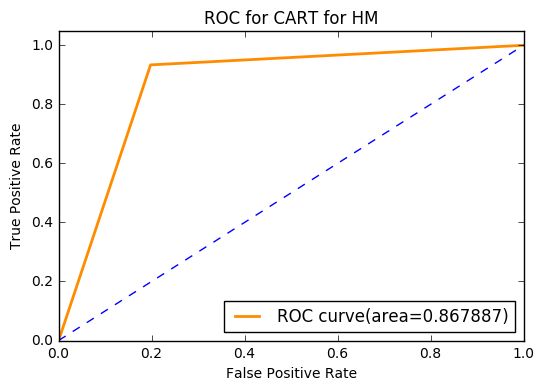

In [67]:
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve(area=%f)' % roc_auc[0])
plt.plot([0,1.0], [0, 1.0], color='blue', linestyle='--')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for CART for HM')
plt.legend(loc='lower right')

plt.show()

**Chiad tree model**

In [68]:
from CHAID import Tree

#CHAID input parameters
indep_variable_cols=['Molecule','QikProp_.stars','QikProp_.amine','QikProp_.amidine','QikProp_.acid',
 'QikProp_.amide','QikProp_.rotor','QikProp_.rtvFG','QikProp_CNS','QikProp_mol_MW','QikProp_dipole','QikProp_SASA','QikProp_FOSA',
 'QikProp_FISA','QikProp_PISA','QikProp_WPSA', 'QikProp_volume','QikProp_donorHB','QikProp_accptHB','QikProp_dip.2.V','QikProp_ACxDN..5.SA',
 'QikProp_glob','QikProp_QPpolrz','QikProp_QPlogPC16','QikProp_QPlogPoct','QikProp_QPlogPw','QikProp_QPlogPo.w',
'QikProp_QPlogS','QikProp_CIQPlogS','QikProp_QPlogHERG','QikProp_QPPCaco','QikProp_QPlogBB','QikProp_QPPMDCK','QikProp_QPlogKp',
 'QikProp_IP.eV.','QikProp_EA.eV.','QikProp_.metab','QikProp_QPlogKhsa','QikProp_HumanOralAbsorption','QikProp_PercentHumanOralAbsorption','QikProp_SAfluorine',
 'QikProp_SAamideO','QikProp_PSA', 'QikProp_.NandO','QikProp_RuleOfFive','QikProp_.ringatoms','QikProp_.in34','QikProp_.in56','QikProp_.noncon',
 'QikProp_.nonHatm','QikProp_RuleOfThree','QikProp_ACxDN..5.SAxSASA.MW']
dep_variable=["Class"]

In [69]:
#zip(indep_variable_cols,['nominal']*3)

In [70]:
#tree from pandas
tree_chaid= Tree.from_pandas_df(HM, dict(zip(indep_variable_cols, ['nominal']*3)), dep_variable, 
                          max_depth=4, min_parent_node_size=80, min_child_node_size=35)
#tree.to_tree

**Random Forest classifier for HM**

In [71]:
RF_hm=RandomForestClassifier(n_estimators=95, random_state=1)
RF_hm.fit(HM_x_train, HM_y_train)
RF_hm_predict= RF_hm.predict(HM_x_test)
acc_RF_HM=RF_hm.score(HM_x_test, HM_y_test)

print(RF_hm.classes_)
print(RF_hm.predict_proba(HM_x_test))
print('accuracy of Random forest for HM model is:', acc_RF_HM)


#matthews correlation coefficient
matt_corr_HM=matthews_corrcoef(HM_y_test, RF_hm_predict)
print('mcc:',matt_corr_HM)

RF_hm.get_params

#MCC OF THE LITERATURE VALUE FOR THE HM RF IS 0.57

['H' 'M']
[[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.24736842  0.75263158]
 ..., 
 [ 1.          0.        ]
 [ 0.05263158  0.94736842]
 [ 0.07368421  0.92631579]]
accuracy of Random forest for HM model is: 0.950292397661
mcc: 0.894659524352


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=95, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)>

In [72]:
confusion_matrix(HM_y_test, RF_hm_predict)

array([[241,  22],
       [ 12, 409]])

In [73]:
cmatrix_rf_hm=confusion_matrix(HM_y_test, RF_hm_predict)
cmatrix_rf_hm.diagonal()/cmatrix_rf_hm.sum(axis=1)
#LITERATURE VALUE FOR consensus model
#H:0.78
#M:0.80

array([ 0.91634981,  0.97149644])

In [74]:
#RF_hm_predict, HM_y_test

In [75]:
y=label_binarize(y_HM, classes=['H', 'M'])
n_classes=y.shape[1]
#roc
fpr=dict()
tpr=dict()
roc_auc=dict()
HM_y_test_col=HM_y_test[:, None]
RF_hm_predict_col=RF_hm_predict[:,None]
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(label_binarize(HM_y_test_col[:,i], classes=['H','M']), 
                                 label_binarize(RF_hm_predict_col[:,i], classes=['H','M']))
    roc_auc[i]= auc(fpr[i], tpr[i])
    

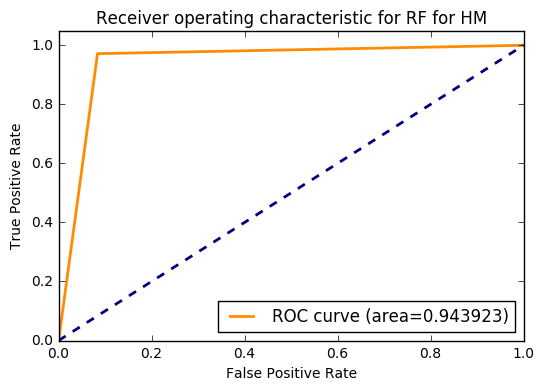

In [76]:
#plotting the ROC curve
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area=%f)' % roc_auc[0])
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for RF for HM')
plt.legend(loc="lower right")
plt.show()


In [77]:
#calculation of confustion matrix
confusion_matrix(y_predict_svc, y_test_final, labels=['L', 'M', 'H'])

array([[  2,   0,   2],
       [ 59, 334, 218],
       [ 12,  76,  57]])

In [78]:
RF_hm_predict_col.shape

(684, 1)

In [79]:
#RF_hm_predict

In [80]:
svc_hm=SVC()
svc_hm.fit(HM_x_train, HM_y_train)
predict_svc_hm=svc_hm.predict(HM_x_test)
acc_svc_hm=svc_hm.score(HM_x_test, HM_y_test)
#matthews correlation coefficient
matt_corr_svc_hm=matthews_corrcoef(HM_y_test, predict_svc_hm)

print('accuracy of svc:', acc_svc_hm)
print('mcc of svc_hm:', matt_corr_svc_hm)
print('order of classes', svc_hm.classes_)
svc_hm.get_params

accuracy of svc: 0.907894736842
mcc of svc_hm: 0.813308836127
order of classes ['H' 'M']


<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [81]:
#writing the confusion matrix for the HM binary class
confusion_matrix(HM_y_test, predict_svc_hm)

array([[200,  63],
       [  0, 421]])

In [82]:
cmatrix_svc_hm=confusion_matrix(HM_y_test, predict_svc_hm)
cmatrix_svc_hm.diagonal()/cmatrix_svc_hm.sum(axis=1)

array([ 0.76045627,  1.        ])

In [83]:
Vote1=RF_hm_predict

In [84]:
#tree_hm_predict

In [85]:
Vote2=tree_hm_predict

In [86]:
Vote3=predict_svc_hm

In [87]:
#voting for a binary model
consensus=[]
for i in range(0, 684):
    if Vote1[i]==Vote2[i]:
        consensus.append(Vote1[i])
    elif Vote1[i]==Vote3[i]:
        consensus.append(Vote1[i])
    elif Vote2[i]==Vote3[i]:
        consensus.append(Vote2[i])
    else:
        consensus.append('NOTCLASSIFIED')
        

In [88]:
consensus_predict=np.array(consensus)
#len(consensus)
confusion_matrix(HM_y_test, consensus_predict)

array([[216,  47],
       [  2, 419]])

In [89]:
cmatrix_tvote=confusion_matrix(HM_y_test, consensus_predict)

In [90]:
cmatrix_tvote.diagonal()/cmatrix_tvote.sum(axis=1)

array([ 0.82129278,  0.99524941])

In [91]:
print(classification_report(HM_y_test, consensus_predict, target_names=['H','M']))

             precision    recall  f1-score   support

          H       0.99      0.82      0.90       263
          M       0.90      1.00      0.94       421

avg / total       0.93      0.93      0.93       684



In [92]:
y=label_binarize(y_HM, classes=['H', 'M'])
n_classes=y.shape[1]
#roc
fpr=dict()
tpr=dict()
roc_auc=dict()
HM_y_test_col=HM_y_test[:, None]
consensus_predict_col=consensus_predict[:,None]
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(label_binarize(HM_y_test_col[:,i], classes=['H','M']), 
                                 label_binarize(consensus_predict_col[:,i], classes=['H','M']))
    roc_auc[i]= auc(fpr[i], tpr[i])
    

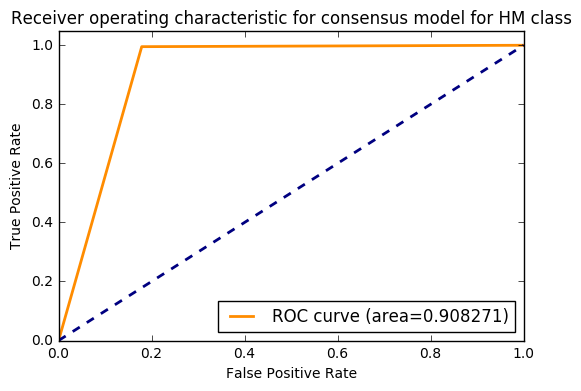

In [93]:
#plotting the ROC curve
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area=%f)' % roc_auc[0])
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for consensus model for HM class')
plt.legend(loc="lower right")
plt.show()

**NN FOR CLASSIFICATION**

In [94]:
#one hot encoding
y_encoder=LabelEncoder()
y_encoded_tr_HM=y_encoder.fit_transform(HM_y_train)
y_en_tr_HM=np_utils.to_categorical(y_encoded_tr_HM)
y_en_tr_HM.shape
y_encoded_test_HM=y_encoder.fit_transform(HM_y_test)
y_en_test_HM=np_utils.to_categorical(y_encoded_test_HM)
y_en_test_HM.shape, y_en_tr_HM.shape

((684, 2), (2735, 2))

In [95]:
y_scaler=StandardScaler()
y_scaler.fit(y_en_tr_HM)
HM_y_train_norm=y_scaler.transform(y_en_tr_HM)
HM_y_test_norm=y_scaler.transform(y_en_test_HM)
HM_y_train_norm.shape, HM_y_test_norm.shape

((2735, 2), (684, 2))

In [96]:
HM_x_train.shape, HM_x_test.shape

((2735, 50), (684, 50))

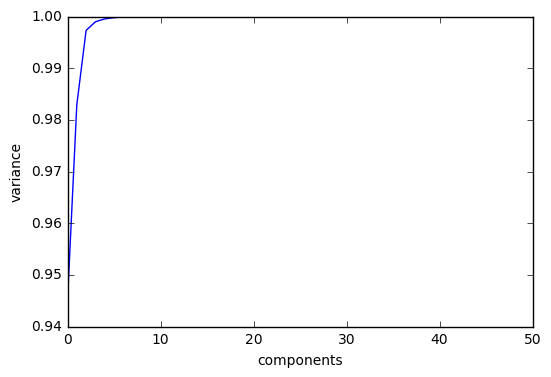

In [97]:
pca=PCA().fit(HM_x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('variance')
#plt.xlim([-0.05, 1.0])
#plt.ylim([0.0, 1.05])
plt.show()

In [98]:
pca=PCA(n_components=5)
HM_x_train_pca=pca.fit_transform(HM_x_train)
HM_x_test_pca=pca.fit_transform(HM_x_test)
HM_x_train_pca.shape

(2735, 5)

In [99]:
x_scaler=StandardScaler()
x_scaler.fit(HM_x_train_pca)
HM_x_train_norm=x_scaler.transform(HM_x_train_pca)
HM_x_test_norm=x_scaler.transform(HM_x_test_pca)
HM_x_train_norm.shape

(2735, 5)

In [100]:
def baseline_model():
    model=Sequential()
    model.add(Dense(51, input_dim=51, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(26, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(13, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(2, init='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [101]:
#fit and evaluate the model
estimators=[]
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, nb_epoch=100, batch_size=20, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, HM_x_train_norm, HM_y_train_norm, cv=kfold)
#print('accuracy:', results.mean()*100)

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(51, activation="relu", kernel_initializer="normal", input_dim=51)`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda

ValueError: Error when checking input: expected dense_1_input to have shape (None, 51) but got array with shape (2461, 5)

**Decision tree classifier for ML**

In [102]:
tree_ml=DecisionTreeClassifier(min_weight_fraction_leaf=0.05, max_leaf_nodes=10)
tree_ml.fit(ML_x_train, ML_y_train)
acc_tree_ml=tree_ml.score(ML_x_test, ML_y_test)
prob_tree_ml=tree_ml.predict_proba(ML_x_test)
predict_tree_ml=tree_ml.predict(ML_x_test)

print('order of classes:',tree_ml.classes_)
print(tree_ml.get_params)
print('accuracy for the CT for ML model:', acc_tree_ml)
print('probability predictions for ML model:', prob_tree_ml)

#matthews correlation coefficient
mat_corr_ML=matthews_corrcoef(ML_y_test, predict_tree_ml)
print('matthews correlation coeff:',mat_corr_ML)

#len(acc_tree_ml),len(ML_x_test)

order of classes: ['L' 'M']
<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.05, presort=False,
            random_state=None, splitter='best')>
accuracy for the CT for ML model: 0.941908713693
probability predictions for ML model: [[ 0.11731844  0.88268156]
 [ 0.          1.        ]
 [ 0.02631579  0.97368421]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.04587156  0.95412844]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.08849558  0.91150442]
 [ 0.3960396   0.6039604 ]
 [ 0.          1.        ]
 [ 0.26126126  0.73873874]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.02631579  0.97368421]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.96899225  0.03100775]
 [ 0.08849558  0.91150442]
 [ 0.          1. 

In [103]:
#computing the confusion matrix
confusion_matrix(ML_y_test, predict_tree_ml)

array([[ 47,  25],
       [  3, 407]])

In [104]:
#computing the accuracies of the predictions of the individual classes
cmatrix_ML_tree=confusion_matrix(ML_y_test, predict_tree_ml)
cmatrix_ML_tree.diagonal()/cmatrix_ML_tree.sum(axis=1)
#literature values of L and M class respectively, ONLY FOR CART MODELS
#L:0.83
#M:0.70
#literature values of L and M on the consensus system
#L:0.79
#M:0.84

array([ 0.65277778,  0.99268293])

In [105]:
#plotting the receiver operating characteristic
fpr=dict()
tpr=dict()
roc_auc=dict()
ML_y_test_col=ML_y_test[:,None]
predict_tree_ml_col=predict_tree_ml[:, None]
for i in range(0, 1):
    fpr[i], tpr[i], _=roc_curve(label_binarize(ML_y_test_col[:, i], classes=['M', 'L']),
                                label_binarize(predict_tree_ml_col[:,i], classes=['M','L']))
    roc_auc[i]=auc(fpr[i], tpr[i])

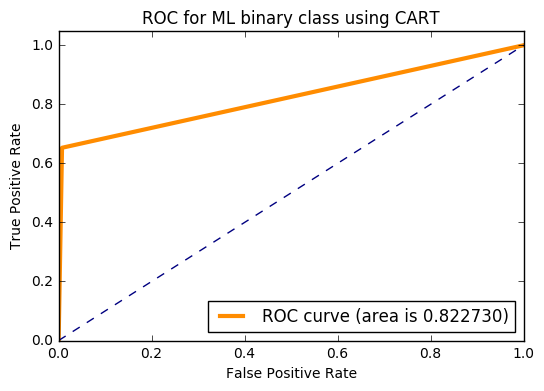

In [106]:
plt.figure()
lw=3
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw,label='ROC curve (area is %f)' % roc_auc[0])
plt.plot([0,1.0], [0, 1.0], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for ML binary class using CART')
plt.legend(loc='lower right')
plt.show()

**Random Forest Classifier for ML**

In [107]:
RF_ml=RandomForestClassifier(n_estimators=23, random_state=2)
RF_ml.fit(ML_x_train, ML_y_train)
accu_RF_ml=RF_ml.score(ML_x_test, ML_y_test)
prob_RF_ml=RF_ml.predict_proba(ML_x_test)
predict_RF_ml=RF_ml.predict(ML_x_test)
#matthews correlation coefficients
matt_coeff_ml=matthews_corrcoef(ML_y_test, predict_RF_ml)

print('order of classes:',RF_ml.classes_)
print('accuracy of model:', accu_RF_ml)
print('probabilities of the respective classes:', prob_RF_ml)
print('matthews correlation coefficient:', matt_coeff_ml )
print(RF_ml.get_params)

order of classes: ['L' 'M']
accuracy of model: 0.95020746888
probabilities of the respective classes: [[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.08695652  0.91304348]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.60869565  0.39130435]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.  

In [108]:
#computing the confusion matrix for random forest
confusion_matrix(ML_y_test, predict_RF_ml)

array([[ 59,  13],
       [ 11, 399]])

In [109]:
cmatrix_rf_ml=confusion_matrix(ML_y_test, predict_RF_ml)
cmatrix_rf_ml.diagonal()/cmatrix_rf_ml.sum(axis=1)

#literature values of the consensus system for L and M classes respectively
#L:0.79
#M:0.84

array([ 0.81944444,  0.97317073])

In [110]:
#plotting the ROC
fpr=dict()
tpr=dict()
roc_auc=dict()
predict_RF_ml_col=predict_RF_ml[:, None]
for i in range(0,1):
    fpr[i], tpr[i], _=roc_curve(label_binarize(ML_y_test_col[:, i], classes=['M','L']),
                                label_binarize(predict_RF_ml_col[:, i], classes=['M','L']))
    roc_auc[i]=auc(fpr[i], tpr[i])

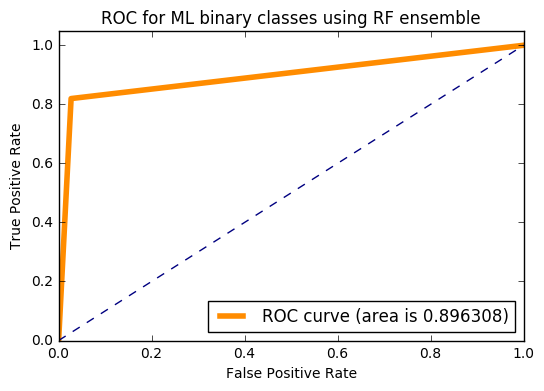

In [111]:
plt.figure()
lw=4
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area is %f)' % roc_auc[0])
plt.plot([0, 1.0], [0, 1.0], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC for ML binary classes using RF ensemble')
plt.show()

In [112]:
svc_ml=SVC()
svc_ml.fit(ML_x_train, ML_y_train)
predict_svc_ml=svc_ml.predict(ML_x_test)
acc_svc_ml=svc_ml.score(ML_x_test, ML_y_test)
#matthews correlation coefficient
matt_corr_svc_ml=matthews_corrcoef(ML_y_test, predict_svc_ml)

print('accuracy of svc:', acc_svc_ml)
print('mcc of svc_hm:', matt_corr_svc_ml)
print('order of classes', svc_ml.classes_)
svc_hm.get_params

accuracy of svc: 0.952282157676
mcc of svc_hm: 0.801943828373
order of classes ['L' 'M']


<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [113]:
Vote1_ml_tree=predict_tree_ml
Vote2_ml_rf=predict_RF_ml
Vote3_ml_svc=predict_svc_ml
Vote1_ml_tree.shape, Vote2_ml_rf.shape, Vote3_ml_svc.shape

((482,), (482,), (482,))

In [114]:
#consensus model
consensus_ml=[]
for i in range(0, 482):
    if Vote1_ml_tree[i]==Vote2_ml_rf[i]:
        consensus_ml.append(Vote1_ml_tree[i])
    elif Vote1_ml_tree[i]==Vote3_ml_svc[i]:
        consensus_ml.append(Vote1_ml_tree[i])
    elif Vote2_ml_rf[i]==Vote3_ml_svc[i]:
        consensus_ml.append(Vote2_ml_rf[i])
    else:
        consensus_ml.append('NOTCLASSIFIED')

In [115]:
predict_consensus_ml=np.array(consensus_ml)

In [116]:
confusion_matrix(ML_y_test, predict_consensus_ml)

array([[ 53,  19],
       [  2, 408]])

In [117]:
cmatrix_ml=confusion_matrix(ML_y_test, predict_consensus_ml)
cmatrix_ml.diagonal()/cmatrix_ml.sum(axis=1)

array([ 0.73611111,  0.99512195])

In [118]:
y=label_binarize(y_ML, classes=['L', 'M'])
n_classes=y.shape[1]
#roc
fpr=dict()
tpr=dict()
roc_auc=dict()
ML_y_test_col=ML_y_test[:, None]
predict_consensus_ml_col=predict_consensus_ml[:,None]
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(label_binarize(ML_y_test_col[:,i], classes=['L','M']), 
                                 label_binarize(predict_consensus_ml_col[:,i], classes=['L','M']))
    roc_auc[i]= auc(fpr[i], tpr[i])
    

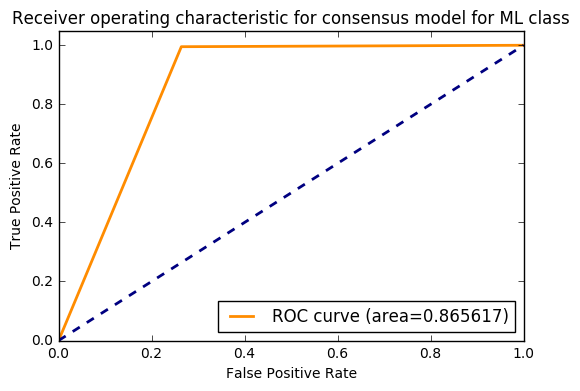

In [120]:
#plotting the ROC curve
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area=%f)' % roc_auc[0])
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for consensus model for ML class')
plt.legend(loc="lower right")
plt.show()


**Decision Tree for the LH model**

In [121]:
tree_LH=DecisionTreeClassifier(min_weight_fraction_leaf=0.05, max_leaf_nodes=10)
tree_LH.fit(HL_x_train, HL_y_train)
acc_tree_LH=tree_LH.score(HL_x_test, HL_y_test)
predict_tree_LH=tree_LH.predict(HL_x_test)
prob_tree_LH=tree_LH.predict_proba(HL_x_test)
#matthews correlation coeff
matt_corrcoef= matthews_corrcoef(HL_y_test, predict_tree_LH)
print('order of classes:', tree_LH.classes_)
print("accuracy of the model", acc_tree_LH)
print('probabilities of the classes:', prob_tree_LH)
print('prediction of classes:', predict_tree_LH)
print('matthews correlation coeff:', matt_corrcoef)

tree_LH.get_params

order of classes: ['H' 'L']
accuracy of the model 0.935028248588
probabilities of the classes: [[ 0.83333333  0.16666667]
 [ 1.          0.        ]
 [ 0.83333333  0.16666667]
 [ 1.          0.        ]
 [ 0.06944444  0.93055556]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.83333333  0.16666667]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.90140845  0.09859155]
 [ 1.          0.        ]
 [ 0.06944444  0.93055556]
 [ 1.          0.        ]
 [ 0.83333333  0.16666667]
 [ 0.4084507   0.5915493 ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.83333333  0.16666667]
 [ 0.          1.        ]
 [ 0.90140845  0.09859155]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.88732394  0.11267606]
 [ 0.83333333  0.16666667]
 [ 0.83333333  0.16666667]
 [ 1.          0.        ]
 [ 0.4084507   0.5915493 ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.         

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.05, presort=False,
            random_state=None, splitter='best')>

In [122]:
#computing the confusion matrix
confusion_matrix(HL_y_test, predict_tree_LH)

array([[273,  11],
       [ 12,  58]])

In [123]:
cmatrix_HL_tree=confusion_matrix(HL_y_test, predict_tree_LH)
cmatrix_HL_tree.diagonal()/cmatrix_HL_tree.sum(axis=1)

array([ 0.96126761,  0.82857143])

In [124]:
#plotting the ROC
fpr=dict()
tpr=dict()
roc_auc=dict()
HL_y_test_col=HL_y_test[:, None]
predict_tree_LH_col=predict_tree_LH[:, None]
for i in range(0,1):
    fpr[i], tpr[i], _ =roc_curve(label_binarize(HL_y_test_col[:, i], classes=['H', 'L']),
                                 label_binarize(predict_tree_LH_col[:, i], classes=['H','L']))
    roc_auc[i]=auc(fpr[i], tpr[i])

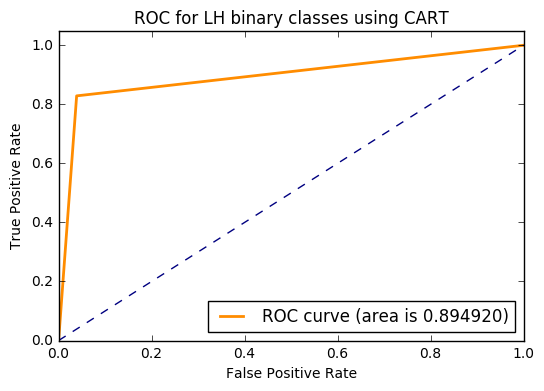

In [125]:
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area is %f)' % roc_auc[0])
plt.plot([0, 1.0], [0, 1.0], color='navy', linestyle='--')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC for LH binary classes using CART')
plt.show()

**Random Forest for LH model**

In [126]:
RF_LH=RandomForestClassifier(n_estimators=47, random_state=3)
RF_LH.fit(HL_x_train, HL_y_train)
acc_RF_HL=RF_LH.score(HL_x_test, HL_y_test)
predict_RF_HL=RF_LH.predict(HL_x_test)
prob_RF_HL=RF_LH.predict_proba(HL_x_test)
#matthews correlation coefficient
matt_corrcoeff_lh=matthews_corrcoef(HL_y_test, predict_RF_HL)

print('order of classes:', RF_LH.classes_)
print('accuracy of model:', acc_RF_HL)
print('probabilities of the respective classes:', prob_RF_HL)
print('predictions of the model:', predict_RF_HL )
print('matthews correlation coefficient:', matt_corrcoeff_lh)

order of classes: ['H' 'L']
accuracy of model: 0.949152542373
probabilities of the respective classes: [[ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.78723404  0.21276596]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.89361702  0.10638298]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.21276596  0.78723404]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.06382979  0.93617021]
 [ 0.89361702  0.10638298]
 [ 0.95744681  0.04255319]
 [ 1.          0.        ]
 [ 0.91489362  0.08510638]
 [ 0.80851064  0.19148936]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.08510638  0.91489362]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 1.          0.        ]
 [ 1. 

In [127]:
#computing the confusion matrix for HL rf
confusion_matrix(HL_y_test, predict_RF_HL)

array([[278,   6],
       [ 12,  58]])

In [128]:
cmatrix_rf_HL=confusion_matrix(HL_y_test, predict_RF_HL)
cmatrix_rf_HL.diagonal()/cmatrix_rf_HL.sum(axis=1)

#LITERATURE VALUE FOR THE LH MODEL FOR ONLY RF
#H:0.95
#L:0.93

array([ 0.97887324,  0.82857143])

In [129]:
#plotting the ROC
fpr=dict()
tpr=dict()
roc_auc=dict()
HL_y_test_col=HL_y_test[:, None]
predict_RF_HL_col=predict_RF_HL[:, None]
for i in range(0,1):
    fpr[i], tpr[i], _ =roc_curve(label_binarize(HL_y_test_col[:, i], classes=['H', 'L']),
                                 label_binarize(predict_RF_HL_col[:, i], classes=['H','L']))
    roc_auc[i]=auc(fpr[i], tpr[i])

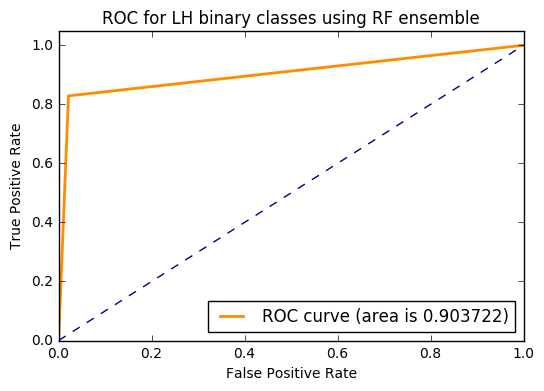

In [130]:
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area is %f)' % roc_auc[0])
plt.plot([0, 1.0], [0, 1.0], color='navy', linestyle='--')
plt.xlim([0, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC for LH binary classes using RF ensemble')
plt.show()

In [131]:
svc_lh=SVC()
svc_lh.fit(HL_x_train, HL_y_train)
predict_svc_lh=svc_lh.predict(HL_x_test)
acc_svc_lh=svc_lh.score(HL_x_test, HL_y_test)
#matthews correlation coefficient
matt_corr_svc_lh=matthews_corrcoef(HL_y_test, predict_svc_lh)

print('accuracy of svc:', acc_svc_lh)
print('mcc of svc_hm:', matt_corr_svc_lh)
print('order of classes', svc_lh.classes_)
svc_lh.get_params

accuracy of svc: 0.90395480226
mcc of svc_hm: 0.675575300171
order of classes ['H' 'L']


<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [132]:
Vote1_lh_tree=predict_tree_LH
Vote2_lh_rf=predict_RF_HL
Vote3_lh_svc=predict_svc_lh
Vote1_lh_tree.shape, Vote2_lh_rf.shape, Vote3_lh_svc.shape

((354,), (354,), (354,))

In [133]:
#consensus voting model
consensus_lh=[]
for i in range(0, 354):
    if Vote1_lh_tree[i]==Vote2_lh_rf[i]:
        consensus_lh.append(Vote1_lh_tree[i])
    elif Vote1_lh_tree[i]==Vote3_lh_svc[i]:
        consensus_lh.append(Vote1_lh_tree[i])
    elif Vote2_lh_rf[i]==Vote3_lh_svc[i]:
        consensus_lh.append(Vote2_lh_rf[i])
    else:
        consensus_lh.append('NOTCLASSIFIED')

In [134]:
predict_consensus_lh=np.array(consensus_lh)

In [135]:
confusion_matrix(HL_y_test, predict_consensus_lh)

array([[278,   6],
       [ 13,  57]])

In [136]:
cmatrix_hl=confusion_matrix(HL_y_test, predict_consensus_lh)
cmatrix_hl.diagonal()/cmatrix_hl.sum(axis=1)

array([ 0.97887324,  0.81428571])

In [137]:
y=label_binarize(y_HL, classes=['L', 'H'])
n_classes=y.shape[1]
#roc
fpr=dict()
tpr=dict()
roc_auc=dict()
HL_y_test_col=HL_y_test[:, None]
predict_consensus_lh_col=predict_consensus_lh[:,None]
for i in range(n_classes):
    fpr[i], tpr[i], _= roc_curve(label_binarize(HL_y_test_col[:,i], classes=['L','H']), 
                                 label_binarize(predict_consensus_lh_col[:,i], classes=['L','H']))
    roc_auc[i]= auc(fpr[i], tpr[i])
    

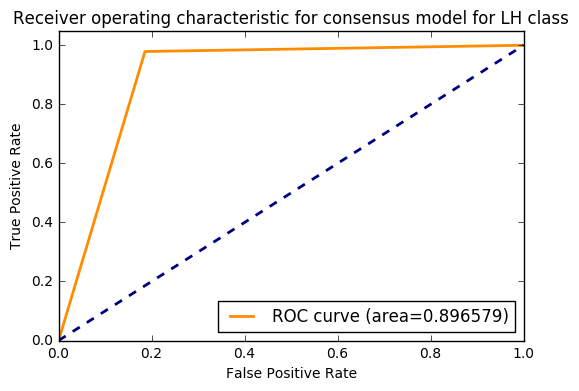

In [138]:
#plotting the ROC curve
plt.figure()
lw=2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area=%f)' % roc_auc[0])
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for consensus model for LH class')
plt.legend(loc="lower right")
plt.show()


**BUILDING A CLASSIFICATION MODEL IN TENSORFLOW FOR LH model**

In [139]:
import tensorflow as tf

In [140]:
training_set, test_set=train_test_split(HL, test_size=0.2)
training_set.shape, test_set.shape

((1413, 53), (354, 53))

In [141]:
COLUMNS=['Molecule','QikProp_.stars','QikProp_.amine','QikProp_.amidine','QikProp_.acid',
 'QikProp_.amide','QikProp_.rotor','QikProp_.rtvFG','QikProp_CNS','QikProp_mol_MW','QikProp_dipole','QikProp_SASA','QikProp_FOSA',
 'QikProp_FISA','QikProp_PISA','QikProp_WPSA', 'QikProp_volume','QikProp_donorHB','QikProp_accptHB','QikProp_dip.2.V','QikProp_ACxDN..5.SA',
 'QikProp_glob','QikProp_QPpolrz','QikProp_QPlogPC16','QikProp_QPlogPoct','QikProp_QPlogPw','QikProp_QPlogPo.w',
'QikProp_QPlogS','QikProp_CIQPlogS','QikProp_QPlogHERG','QikProp_QPPCaco','QikProp_QPlogBB','QikProp_QPPMDCK','QikProp_QPlogKp',
 'QikProp_IP.eV.','QikProp_EA.eV.','QikProp_.metab','QikProp_QPlogKhsa','QikProp_HumanOralAbsorption','QikProp_PercentHumanOralAbsorption','QikProp_SAfluorine',
 'QikProp_SAamideO','QikProp_PSA', 'QikProp_.NandO','QikProp_RuleOfFive','QikProp_.ringatoms','QikProp_.in34','QikProp_.in56','QikProp_.noncon',
 'QikProp_.nonHatm','QikProp_RuleOfThree','QikProp_ACxDN..5.SAxSASA.MW','Class']
FEATURES=['Molecule','QikProp_.stars','QikProp_.amine','QikProp_.amidine','QikProp_.acid',
 'QikProp_.amide','QikProp_.rotor','QikProp_.rtvFG','QikProp_CNS','QikProp_mol_MW','QikProp_dipole','QikProp_SASA','QikProp_FOSA',
 'QikProp_FISA','QikProp_PISA','QikProp_WPSA', 'QikProp_volume','QikProp_donorHB','QikProp_accptHB','QikProp_dip.2.V','QikProp_ACxDN..5.SA',
 'QikProp_glob','QikProp_QPpolrz','QikProp_QPlogPC16','QikProp_QPlogPoct','QikProp_QPlogPw','QikProp_QPlogPo.w',
'QikProp_QPlogS','QikProp_CIQPlogS','QikProp_QPlogHERG','QikProp_QPPCaco','QikProp_QPlogBB','QikProp_QPPMDCK','QikProp_QPlogKp',
 'QikProp_IP.eV.','QikProp_EA.eV.','QikProp_.metab','QikProp_QPlogKhsa','QikProp_HumanOralAbsorption','QikProp_PercentHumanOralAbsorption','QikProp_SAfluorine',
 'QikProp_SAamideO','QikProp_PSA', 'QikProp_.NandO','QikProp_RuleOfFive','QikProp_.ringatoms','QikProp_.in34','QikProp_.in56','QikProp_.noncon',
 'QikProp_.nonHatm','QikProp_RuleOfThree','QikProp_ACxDN..5.SAxSASA.MW']
LABEL=['Class']


In [ ]:
feature_cols=[tf.feature_column.numeric_column(k) for k in FEATURES]
feature_cols

In [ ]:
def get_input_fn(data_set, num_epochs=None, shuffle=True):
    return tf.estimator.inputs.pandas_input_fn(x=pd.DataFrame({j:data_set[j] for j in FEATURES}),
                                              y=pd.DataFrame(data_set[LABEL].values),
                                              num_epochs=num_epochs, shuffle=shuffle)

In [ ]:
Classifier=tf.estimator.DNNClassifier(feature_columns=feature_cols, hidden_units=[51,51,30,20,10], n_classes=2)

In [ ]:
Classifier.train(input_fn=get_input_fn(ML), steps=1000)

**COMBINING THE THREE VOTING SYSTEMS OF THE BINARY CLASSES**

In [ ]:
Vote1_ens=consensus_predict
Vote2_ens=predict_consensus_ml
Vote3_ens=predict_consensus_lh
Vote1_ens.shape, Vote2_ens.shape, Vote3_ens.shape

In [ ]:
ensemble=np.concatenate((Vote1_ens, Vote2_ens, Vote3_ens))
ensemble.shape

In [ ]:
ensemble_unique, indices, counts=np.unique(ensemble, return_counts=True, return_index=True)
ensemble_unique

In [ ]:
print(counts)